<a href="https://colab.research.google.com/github/pahanmendis/EN2550/blob/main/EN2550_2021_Object_Counting_on_a_Convey_Belt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EN2550 2021: Object Counting on a Convey Belt**

In this assignment, you will be counting and tracking the hexagonal nuts on a moving convey belt


 **Let's first import required libraries**


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


%matplotlib inline

Let's load and visualize the template image and the convey belt snapshot at a given time.




In [2]:
template = r'/content/drive/MyDrive/Computer Vision/Assignment05/template.png'
belt = r'/content/drive/MyDrive/Computer Vision/Assignment05/belt.png'

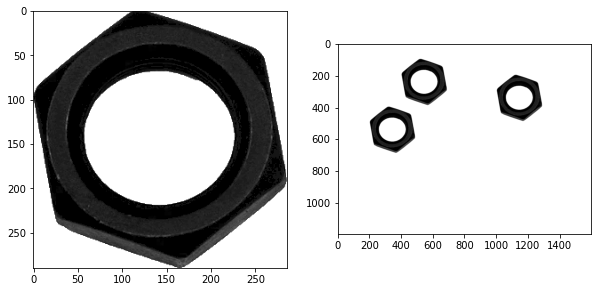

In [3]:
template_im = cv.imread(template, cv.IMREAD_GRAYSCALE)
belt_im =  cv.imread(belt, cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

# **Part-I :**
Before going into the implementation, let's play with some functions.

# **Otsu's thresholding**
Please read [thresholding](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) to get an idea about different types of thresholding and how to use them.(Please use `cv.THRESH_BINARY_INV`).

In [4]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

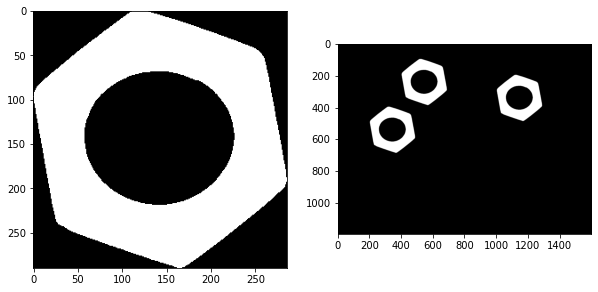

In [5]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

## **Morphological closing**
Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See [closing](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) for a guide.

In [6]:
#kernel = #"< 3x3 matrix with all ones, with uint8 dtype>" 

kernel = np.ones((3,3),np.uint8)
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

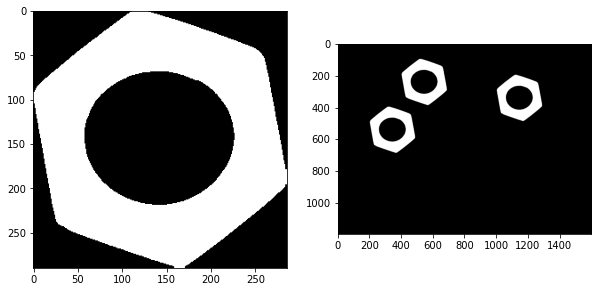

In [7]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

# **Connected component analysis**
Apply the connectedComponentsWithStats function ( [see this](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)).

In [8]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)


*   How many connected compoonets are detected in each image?
*   What are the statistics? Interpret these statistics.
* What are the centroids?


# **Contour analysis**
Use findContours function to retrieve the extreme outer contours. ( [see](https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html) for help and [see](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) for information.)

Display these countours.

In [9]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

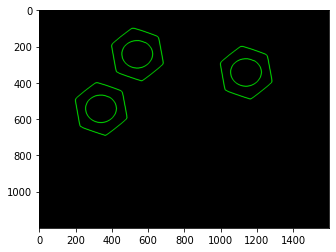

In [10]:
# Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

# **Count the number of matching hexagonal nuts in belt.png.**

Use the `matchShapes` function as shown in [examples](https://https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html) to match contours in the belt image with that in the template.

Get an idea about the value output by the `cv.matchShapes` when both the template and the reference image have the same shape. Understand the given code snippet.

In [11]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')   
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)  
for j,c in enumerate(belt_cont):
        print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0))

0.00010071698397151607
0.00010071698397928763
0.00010071698397484674


# **Part - II**
Frame tracking through image moments.
Use the `cv.contourArea()`, see [this](https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html) and calculate the the area of the `contours_b[1]`

In [12]:
cnt=contours_b[1]
ca = cv.contourArea(cnt)
print(ca)

20080.0


Use the `cv.moments` to extract the x and y coordinates of the centroid of `contours_b[1]`.

In [13]:
M = cv.moments(cnt)
print(M)
cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
print(cx,cy)

{'m00': 20080.0, 'm10': 6857249.333333333, 'm01': 10902219.5, 'm20': 2377821838.6666665, 'm11': 3722971235.5, 'm02': 5947774212.166666, 'm30': 836677775088.6001, 'm21': 1290927450455.1833, 'm12': 2031031745454.1167, 'm03': 3260276110202.5503, 'mu20': 36095323.75130558, 'mu11': -98356.04525279999, 'mu02': 28531680.98238945, 'mu30': 7133283.688598633, 'mu21': -18102990.339790344, 'mu12': -5413550.269262314, 'mu03': 14292721.049316406, 'nu20': 0.08952071135603398, 'nu11': -0.00024393473231774097, 'nu02': 0.07076197446863307, 'nu30': 0.00012484760770737689, 'nu21': -0.00031684076155347586, 'nu12': -9.474862206886426e-05, 'nu03': 0.0002501529601981355}
341 542


Make a variable called `count` to represent the number of contours and set it to the value 1. Make an np array [cx, cy, ca, count] and name this as `object_prev_frame`

In [14]:
count = 1
object_prev_frame = np.array([cx,cy,ca,count])
print(object_prev_frame)

[3.410e+02 5.420e+02 2.008e+04 1.000e+00]


Similarly, you can create the `object_curr_frame`(to describe the current values) and define the threshold `delta_x` to check whether the corresponding element of both the `object_curr_frame` and object_prev_frame are less than the `delta_x`. You can set `delta_x` as 15 or so. (Here the `delta_x` can be thought of as the movement of the cx from frame to frame)

In [15]:
delta_x = 15

# **Part - III**
1. Implement the function get_indexed_image, which takes an image as the input, performs thresholding, closing, and connected component analysis and return retval, labels, stats, centroids. (Grading)

In [16]:
def get_indexed_image(im):
    """ Thresholding, closing, and connected component analysis lumped
    """ 

    #'< Your code goes here. Approximately 4 lines >'
    kernel = np.ones((3,3),np.uint8)
    th_thresh, img_thresh = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    closing_img = cv.morphologyEx(img_thresh, cv.MORPH_CLOSE, kernel)
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_img)
    return retval, labels, stats, centroids 

2. Implement the function is_new, which checks the dissimilarity between 2 vectors. (Grading)

In [81]:
def is_new(a, b, delta, i):
    """ Vector Dissimilarity with an Array of Vectors
    Checks if vector b is similar to a one or more vectors in a outside the tolerances specified in delta. 
    vector i specifies which elements in b to compare with those in a. 
    """


    #'Check whether the absolute different between all the elements of ith column of each array is greater than the ith delta value (See thee example in the next cell)'
    #print(i)

    diff = ((np.abs(a - b))[:,i] > delta[i])
    if diff.all() == True:
      return True
    return False

In [82]:
# check is_new  expected answer False

a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
 [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
 [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert is_new(a, b, delta, i) == False, " Check the function "

3. If the array a is in the shape of (number of nuts , len(object_prev_frame)) ( i.e. array a is made by stacking all the object_prev_frame for each frame. If b is in the form of [cx, cy, ca, count], write the function prev_index to find the index of a particular nut in the previous frame. (Grading)

In [19]:
def prev_index(a, b, delta, i):
    """ Returns Previous Index
    Returns the index of the apppearance of the object in the previous frame.
    (See thee example in the next cell)
    """
    index = -1
    n = a.shape[0] # number of nuts
    for nut in range(n):
      diff = np.abs(a[nut][i] - b[i]) <= delta[i]
      if diff.all():
        index = nut
    return index

In [20]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
 [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
 [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert prev_index(a,b,delta,i) == 1, " Check the function "

You can use following code snippet load and access each frame of a video

In [ ]:
cap = cv.VideoCapture('/content/drive/MyDrive/Computer Vision/Assignment05/conveyor_with_rotation.mp4') # give the correct path here
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2_imshow(frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows() 

# **3. Implement a code to detect hexagonal nuts in a moving convey belt. (Grading)**
**Steps:**
1. Use the above code snippet to access each frame and remember to convert the  frame into grey scale. Name the variable as `grey`
2. Call `get_indexed_image` and extract `retval, labels, stats, centroids`.
3. Find contours of all nuts present in a given frame of the belt.
4. Initiate a 3-D array with zeros to draw contours. Call this `im_contours_belt`
5. Draw each contour. Use `cv.drawContours`. [See this](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html)
# **Object detection and tracking**
For each contour of the belt frame,

1. Use `is_new` and `prev_index` functions to track each frame and get the indices of each nut.
2. Write a code to detect and track hexagonal nuts in each frame.
3. You may refer, [annotation](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html) to understand how to add texts and labels to each frame.
4. Output for a random frame would be as follows 
**Hint:** *If you are thresholding on areas (template and contour) you can use 500 as the threshold. You can set the matching threshold to be 0.5 and experiment*

In [21]:
# step1
cap = cv.VideoCapture('/content/drive/MyDrive/Computer Vision/Assignment05/conveyor_with_rotation.mp4') # give the correct path here
frameArray=[]
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #cv2_imshow(frame)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frameArray.append(gray)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows() 

Can't receive frame (stream end?). Exiting ...


280


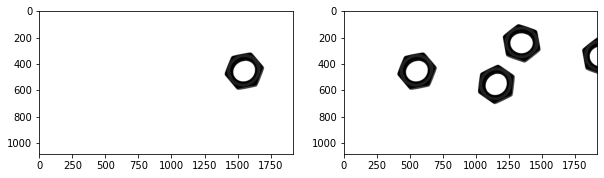

In [22]:
print(len(frameArray))
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(frameArray[0], cmap='gray')
ax[1].imshow(frameArray[100], cmap='gray')
plt.show()

In [23]:
#step2
stats=[]
for grayImage in frameArray:
  stats.append([get_indexed_image(grayImage)])


In [24]:
print(stats[100])

[(5, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), array([[      0,       0,    1920,    1080, 1934917],
       [   1200,     100,     286,     290,   40610],
       [   1800,     200,     120,     276,   17222],
       [    404,     313,     297,     282,   40433],
       [   1013,     406,     277,     297,   40418]], dtype=int32), array([[ 947.91138948,  548.95854809],
       [1342.82878601,  243.78401871],
       [1861.20317036,  342.07960748],
       [ 552.36517201,  453.71478743],
       [1152.20047998,  553.75226384]]))]


In [25]:
#step3
contourArray=[]
for eachImage in frameArray:


  th, img = cv.threshold(eachImage,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  kernel = np.ones((3,3),np.uint8)
  closing_img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
  contours_img, hierarchy_img = cv.findContours(closing_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  # Visualizing contours
  im_contours_belt = np.zeros((eachImage.shape[0],eachImage.shape[1],3), np.uint8)
  conts = cv.drawContours(im_contours_belt, contours_img, -1, (0,255,0), 3).astype('uint8')
  contourArray.append(conts)

280


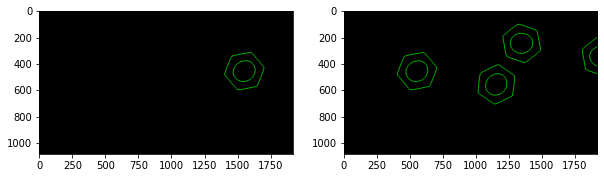

In [26]:
#testing 
print(len(contourArray))
fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(contourArray[0], cmap='gray')
ax[1].imshow(contourArray[100], cmap='gray')
plt.show()

# Object detection and tracking

In [64]:
#step6
outputVideo=[]
for eachFrame in frameArray:
  retval, labels, stats, centroids = get_indexed_image(eachFrame)
  label = 1 # remember that the label of the background is 0
  belt = ((labels >= label)*255).astype('uint8')
  belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)  

  noOfNuts=0
  frame =[]

  for contours in belt_cont:
    match = cv.matchShapes(contours_t[0], contours, cv.CONTOURS_MATCH_I1, 0.0)  #must import contour_t[0]

    if match <= 0.5: #indicating a good match
      noOfNuts+=1
      momentArray = cv.moments(contours)
      ca = momentArray['m00']
      cx, cy = int(momentArray['m10']/momentArray['m00']),int(momentArray['m01']/momentArray['m00'])
      #print(cx,cy)
      frame.append(np.array([cx, cy, ca, noOfNuts]))
  outputVideo.append(frame)





In [65]:
print(outputVideo[0][-1][-1])
#print(outputVideo[0].shape)

1.0


In [83]:
totalNuts = int(outputVideo[0][-1][-1]) #inital nuts at the begning
delta_x=np.array([15])
i = np.array([0])

object_prev_frame = outputVideo[0]

for index in range(1,len(outputVideo)):
    object_curr_frame = outputVideo[index]
    #print('index',index)

    for nutDetails in object_curr_frame:
      #print(nutDetails)
      if is_new(object_prev_frame, nutDetails, delta_x, i) == True: #new nut is found
        #print('new nut is found')
        totalNuts+=1
    object_prev_frame=object_curr_frame

print("total number of nuts : ",totalNuts)

total number of nuts :  5
